In [1]:
import pandas as pd
import re # Expresiones regulares
import matplotlib.pyplot as plt

## Visualización de los datos
- Mostrar los 3 conjuntos de datos para entender su relación
- Las tablas test y train, están relacionadas con la tabla gender_submission por la columna PassengerID

In [2]:
# Rutas relativas a los distintos dataset
gender_submision_path = 'data/gender_submission.csv'
test_path = 'data/test.csv'
train_path = 'data/train.csv'

In [3]:
# Mostramos el dataset gender_submision
gs = pd.read_csv(gender_submision_path)
# Mostramos las 3 primeras y últimas filas
pd.concat([gs.head(3), gs.tail(3)])

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
415,1307,0
416,1308,0
417,1309,0


In [4]:
# Mostramos el dataset test
test = pd.read_csv(test_path)
# Mostramos las 3 primeras y últimas filas
pd.concat([test.head(3), test.tail(3)])

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
# Mostramos el dataset train
train = pd.read_csv(train_path)
# Mostramos las 3 primeras y últimas filas
pd.concat([train.head(3), train.tail(3)])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


## Data wrangling

In [6]:
# Comprobamos la longitud de los 3 dataset
len(gs), len(test), len(train)

(418, 418, 891)

Tras analizar los datos de nuevo, podemos llegar a la conclusión de que combinando las tablas 'gs' y 'test', podemos extender el dataframe 'train' y crear un único dataframe que combina la información de los 3 archivos csv.

In [7]:
# Usamos el método merge de pandas, para unir a través de las columnas en común ambos conjuntos
gs_test = pd.merge(gs, test, left_on='PassengerId', right_on='PassengerId', how='left')
gs_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
# Vamos a unir ambos dataframes en un único dataframe que contenga toda la información
# acerca de los pasajeros del Titanic, lo llamaremos 'df' por simplificar la sintaxsix
df = train.append(gs_test, ignore_index=True, sort=False)

# Mostramos las 3 primeras y últimas filas
pd.concat([df.head(3), df.tail(3)])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


## ¿Cuántas personas iban en el Titanic?

In [9]:
# Comprobamos si hay duplicados en la columna 'Name'
df[df['Name'].duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
891,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
897,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q


In [10]:
# Hay dos nombres que se repiten, vamos a guardar estos nombres
duplicated_names = df[df['Name'].duplicated()]['Name']
# Mostramos los registros con nombres repetidos
df[df['Name'].isin(duplicated_names)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
289,290,1,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q
696,697,0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S
891,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
897,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q


Los pasajeros con el mismo nombre no tienen la misma edad, ni el mismo ticket, con lo que podemos deducir que esta coincidencia es mera casualidad.

In [11]:
# Calculamos la longitud del dataframe
total_passengers = len(df)
print(f'El número total de pasajeros en el Titanic es de {total_passengers}')

El número total de pasajeros en el Titanic es de 1309


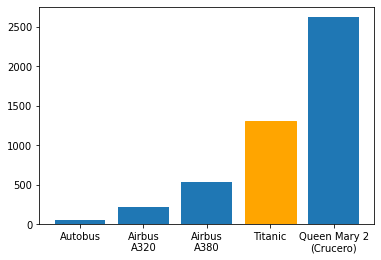

In [12]:
# Representación gráfica, utilizamos datos de otros medios de transporte para comparar (aproximados)
# Creamos un diccionario que recoja la información de varios medios de transporte
data = {
    'Autobus': 50,
    'Airbus\nA320': 220,
    'Airbus\nA380': 538,
    'Titanic': total_passengers,
    'Queen Mary 2\n(Crucero)': 2620,
}

# Extraemos las etiquetas y los valores en dos listas independientes
labels = data.keys()
values = data.values()

# Generamos un grafico de barras, resaltando la columna del Titanic en color naranja
barlist = plt.bar(labels, values)
barlist[3].set_color('orange')

## ¿Cuántos hombres y mujeres sobrevivieron?

In [13]:
# Evaluamos las condiciones
is_male = df['Sex'] == 'male'
is_female = df['Sex'] == 'female'
survived = df['Survived'] == 1

# Calculamos la longitud de los subconjuntos aplicando los filtros anterirores
survivors_men = len(df[is_male & survived])
survivors_women = len( df[is_female & survived])

print(f'Sobrevivieron {survivors_men} hombres')
print(f'Sobrevivieron {survivors_women} mujeres')

Sobrevivieron 109 hombres
Sobrevivieron 385 mujeres


## ¿Cuál fue el top 10 de edad que más sobrevieron y el top 10 de edad que no lo lograron?

In [14]:
# Redondeamos las edades, para obtener una cantidad razonable de grupos
df['Age'] = df['Age'].round()
# Hacemos una agrupación por edades
age_grouped = df.groupby(by=["Age"])

In [15]:
# Dataframe vacío para albergar la información de cada grupo
survivors_by_age = pd.DataFrame(columns = ['Age', 'Survivors', 'Population', 'SurvivalRate'])

# Iteramos cada grupo de edad para obtener la siguiente información:
    # Número de supervivientes
    # Población total
for age, group in age_grouped:
    survivors = len(group[group['Survived'] == 1])
    population = len(group)
    survival_rate = survivors / population
    # Indice de la nueva fila del dataframe donde se insertarán los valores
    new_row_index = len(survivors_by_age)
    survivors_by_age.loc[new_row_index] = [int(age), survivors, population, survival_rate]

In [16]:
# Mostramos el dataframe generado
survivors_by_age.sort_values(by='SurvivalRate')

,Age,Survivors,Population,SurvivalRate
65,65.0,0.0,3.0,0.000000
70,74.0,0.0,1.0,0.000000
57,57.0,0.0,5.0,0.000000
69,71.0,0.0,2.0,0.000000
68,70.0,0.0,3.0,0.000000
...,...,...,...,...
5,5.0,4.0,5.0,0.800000
15,15.0,5.0,6.0,0.833333
3,3.0,6.0,7.0,0.857143
71,76.0,1.0,1.0,1.000000


In [17]:
# Ordernamos por el dataframe por el ratio de supervivencia y obtenemos los primeros 10 valores
top_ten_survival_groups = survivors_by_age.sort_values(by='SurvivalRate', ascending=False)[:10]
# Ordernamos por el dataframe por el ratio de supervivencia y obtenemos los últimos 10 valores
bottom_ten_survival_groups = survivors_by_age.sort_values(by='SurvivalRate', ascending=False)[-10:]

# Mostramos los resultados TOP 10 de edad que más sobrevivió 
print(f'Los 10 grupos de edad que más sobrevivieron:')
for i, row in top_ten_survival_groups.iterrows():
    age = row['Age']
    survivors = int(row['Survivors'])
    population = int(row['Population'])
    survival_rate = round(row['SurvivalRate'], 2)
    print(f'\t- Grupo de {age} años con un ratio de supervivencia de {survival_rate}. Sobrevivieron {survivors} de {population}.')

# Mostramos los resultados TOP 10 de edad que menos sobrevivió.
print(f'\nLos 10 grupos de edad que menos sobrevivieron:')
# Le damos la vuelta al dataframe para iterar primero los elementos con menos tasa de supervivencia
for i, row in bottom_ten_survival_groups.iloc[::-1].iterrows():
    age = row['Age']
    survivors = int(row['Survivors'])
    population = int(row['Population'])
    survival_rate = round(row['SurvivalRate'], 2)
    print(f'\t- Grupo de {age} años con un ratio de supervivencia de {survival_rate}. Sobrevivieron {survivors} de {population}.')

Los 10 grupos de edad que más sobrevivieron:
	- Grupo de 80.0 años con un ratio de supervivencia de 1.0. Sobrevivieron 1 de 1.
	- Grupo de 76.0 años con un ratio de supervivencia de 1.0. Sobrevivieron 1 de 1.
	- Grupo de 3.0 años con un ratio de supervivencia de 0.86. Sobrevivieron 6 de 7.
	- Grupo de 15.0 años con un ratio de supervivencia de 0.83. Sobrevivieron 5 de 6.
	- Grupo de 5.0 años con un ratio de supervivencia de 0.8. Sobrevivieron 4 de 5.
	- Grupo de 1.0 años con un ratio de supervivencia de 0.79. Sobrevivieron 15 de 19.
	- Grupo de 12.0 años con un ratio de supervivencia de 0.75. Sobrevivieron 3 de 4.
	- Grupo de 63.0 años con un ratio de supervivencia de 0.75. Sobrevivieron 3 de 4.
	- Grupo de 48.0 años con un ratio de supervivencia de 0.71. Sobrevivieron 10 de 14.
	- Grupo de 4.0 años con un ratio de supervivencia de 0.7. Sobrevivieron 7 de 10.

Los 10 grupos de edad que menos sobrevivieron:
	- Grupo de 74.0 años con un ratio de supervivencia de 0.0. Sobrevivieron 0 de 1

## ¿Cuántos cargos o títulos iban en el barco? Ejemplo: Capitanes, Mrs. Miss, etc. (pista: usa expresiones regulares)

In [18]:
# Patron regex que busca substring desde el grupo de caracteres ', ' hasta el caracter '.'
pattern = '(?<=\, )(.*?)(?=\.)'

# Creamos una nueva columna aplicando este filtro a la columna 'Names'
df['Title'] = df['Name'].str.extract(pattern)

# Guardamos los títulos en una lista y calculamos su número
unique_titles = df['Title'].unique()
number_of_titles = len(unique_titles)

# Mostramos los resultados
print(f'Hay {number_of_titles} títulos en el barco y son:')
for title in unique_titles:
    print(f'\t- {title}')

Hay 18 títulos en el barco y son:
	- Mr
	- Mrs
	- Miss
	- Master
	- Don
	- Rev
	- Dr
	- Mme
	- Ms
	- Major
	- Lady
	- Sir
	- Mlle
	- Col
	- Capt
	- the Countess
	- Jonkheer
	- Dona


## ¿Cuánto es la sumatoria del valor de los tickets en EUR? (pista: los tickets se vendieron en libras esterlinas)

In [19]:
# Factor de conversión de libras a euros
POUND_TO_EURO = 1.17
# Coste total en libras esterlinas
total_fare_pound = df['Fare'].sum()
# Convertimos el importe a euros
total_fare_euro = total_fare_pound * POUND_TO_EURO

print('El importe total de los billetes del barco fue de %.2f EUR' % total_fare_euro)

El importe total de los billetes del barco fue de 50954.07 EUR
